# <center>MACHINE LEARNING <br> <br> Problem Session 3 <br> Gaussian Mixture Models</center>

**Useful Python Functions**

- `mu = np.mean(X)` returns the mean of $X$ taking each row as a sample, i.e., if $X$ is a $n\times m$ matrix, `np.mean(X)` is a $1 \times m$ matrix.<br>
To compute the mean along the columns (taking each column as a sample), `np.mean(X, axis = 1)`.

- `cov = np.cov(X)` returns the covariance matrix of $X$ considering each column as a sample.

- `X_inv = np.linalg.inv(X)` returns the inverse of a matrix $X$.

- `np.dot(A,B)` returns the dot product of $A$ and $B$ (can be matrices).

- `np.arccos(a)` returns the $\arccos$, i.e., $\cos^{-1}$, of $a\in [-1,1]$, i.e, an angle $\theta$ (in radians) such that $\cos(\theta) = a$.

- `np.linalg.svd(A)` returns the matrices $U, D$, and $V^\top$ such that $A = UDV^\top$.
`u, s, vh = np.linalg.svd(A)` $\Rightarrow$ smat = np.diag(s), A = np.dot(u, np.dot(smat, vh))

- `plt.scatter(x,y)` plots the points (as dots) whose x-coordinates is given by the array $x$ and whose y-coordinates is given by $y$.

- `plt.plot(x,y)` same as plt.scatter but with lines (other options are available).

In [1]:
################################
# NEEDED IMPORTS AND FUNCTIONS #
################################

# LLIBRERIES
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as multiNorm


# DRAWING FUNCTIONS
def draw_vector(p,v):
    # Plots the vector v with  origin at point p
    plt.quiver(p[0],p[1], v[0], v[1])
    plt.axis('equal')
    
def draw_segment(A,B):
    # Plots a segment of a line from point A to point B
    if np.isclose(A[0],B[0],atol=1e-2):
        y = np.linspace(A[1],B[1],100)
        x = np.ones(y.shape) * A[0]
    else:
        x = np.linspace(A[0],B[0],100)
        y = A[1] + (x - A[0]) * (B[1]-A[1])/(B[0]-A[0])
        
    # draw the curve
    plt.plot(x, y)
    plt.axis('equal')


### Exercise 1

Consider two different Gaussian models, $G_1$ and $G_2$ with means and covariances:
$$
\mu_1 = \begin{bmatrix}-1\\0\end{bmatrix}, \Sigma_1 = \begin{bmatrix}3 & 0\\0 & 1\end{bmatrix},\\
\mu_2 = \begin{bmatrix}0\\4\end{bmatrix}, \Sigma_2 = \begin{bmatrix}2 & -1\\-1 & 2\end{bmatrix}.
$$

(b). (*In Jupyter Notebook*) Draw 500 random samples from a mixture of Gaussians $G_1$ and $G_2$ for different values of the mixing coefficients (modeling point of view).

For example, this figure shows 1000 random samples using $\pi_A = 0.1$ and $\pi_B = 0.9$.

In [2]:
##########################################
# FUNCTIONS FROM P2

def PC_and_Mhd(mu,Cov,k):
    u, s, vh = np.linalg.svd(Cov)

    a = np.sqrt(s[0]) * k
    b = np.sqrt(s[1]) * k
    t = np.linspace(0, 2*np.pi, 200)
    
    newBasis = np.dot( u, np.array([a*np.cos(t),b*np.sin(t)]) )
    plt.plot(newBasis[0,:]+mu[0],newBasis[1,:]+mu[1])

    return u, s



def Gaussian_model(X):

    mu = np.mean(X,axis = 1)
    Cov = np.cov(X)

    plt.scatter(X[0,:], X[1,:])
    plt.axis('equal')
    
    u, s = PC_and_Mhd(mu,Cov,1)
    u, s = PC_and_Mhd(mu,Cov,2)
    u, s = PC_and_Mhd(mu,Cov,3)
    
    return mu, u, s

def draw_samples_from_Gaussian(mu,Cov,n):
    X = np.random.multivariate_normal(mu,Cov,n)
    return X

##########################################

# YOUR CODE HERE


### Exercise 2

*Computations*

0.9999999717631932 2.8236806756652958e-08
0.06802944958697277 0.9319705504130272
0.002597269692161751 0.9974027303078382


TypeError: ignored

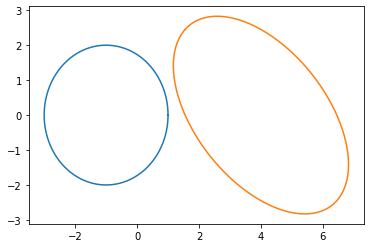

In [29]:
X = np.array([[-4,2,-2],[0,0,6]])
pi1 = 0.8
mu1 = np.array([-1,0])
Cov1 = np.array([[1,0],[0,1]])

pi2 = 0.2
mu2 = np.array([4,0])
Cov2 = np.array([[2,-1],[-1,2]])

PC_and_Mhd(mu1,Cov1,2)
PC_and_Mhd(mu2,Cov2,2)

p1=(-4,0)
prob1 = (pow(2*np.pi,-1)*pow(np.linalg.det(Cov1),-1/2)*np.exp(-1/2*np.transpose(p1-mu1)@np.linalg.inv(Cov1)@(p1-mu1))) 
prob2= (pow(2*np.pi,-1)*pow(np.linalg.det(Cov2),-1/2)*np.exp(-1/2*np.transpose(p1-mu2)@np.linalg.inv(Cov2)@(p1-mu2))) 
r11 = prob1/(prob1+prob2)
r12 = prob2/(prob1+prob2)
print(r11,r12)

p2=(2,0)  
prob11 = (pow(2*np.pi,-1)*pow(np.linalg.det(Cov1),-1/2)*np.exp(-1/2*np.transpose(p2-mu1)@np.linalg.inv(Cov1)@(p2-mu1))) 
prob22= (pow(2*np.pi,-1)*pow(np.linalg.det(Cov2),-1/2)*np.exp(-1/2*np.transpose(p2-mu2)@np.linalg.inv(Cov2)@(p2-mu2))) 
r21 = prob11/(prob11+prob22)
r22 = prob22/(prob11+prob22)
print(r21,r22)

p3=(-2,6)  
prob111 = (pow(2*np.pi,-1)*pow(np.linalg.det(Cov1),-1/2)*np.exp(-1/2*np.transpose(p3-mu1)@np.linalg.inv(Cov1)@(p3-mu1))) 
prob222= (pow(2*np.pi,-1)*pow(np.linalg.det(Cov2),-1/2)*np.exp(-1/2*np.transpose(p3-mu2)@np.linalg.inv(Cov2)@(p3-mu2))) 
r31 = prob111/(prob111+prob222)
r32 = prob222/(prob111+prob222)
print(r31,r32)

N1=r11+r21+r31
N2=r12+r22+r32
X=
mu1=(1/N1)*(r11*p1+r21*p2+r31*p3)
mu2=(1/N2)*(r12*p1+r22*p2+r32*p3)

Cov1 = (1/N1)*(r11*)

### Exercise 3

You are hired as a data scientist by a supermarket mall. They want a better knowledge about their customers to be able to make more targeted advertising campaings. 
Through membership cards, they have some basic data about the customers like Customer ID, age, gender, annual income and spending score and they ask you to apply clustering to detect different customer profiles.

In this exercise we use the following dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python . We start opening the dataset and keeping only the two last columns that correspond to anual income and spending score, since this are the features that we have been told to analyse:

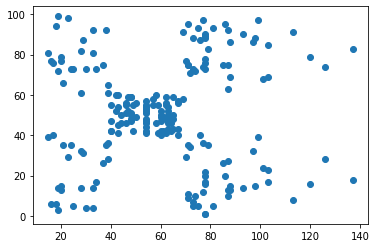

In [ ]:
from numpy import genfromtxt
from sklearn.mixture import GaussianMixture
import sklearn

X = genfromtxt('Mall_Customers.csv', delimiter=',')
X=np.delete(X,0,0)
X=np.delete(X,[0,1,2],1)
plt.scatter(X[:,0],X[:,1])


a) Find clusters in the dataset by using mixture of gaussians. Try with different values of $k$ and compute the silhouette score for each one. Choose one value of $k$ (and justify your election) to do the following parts.

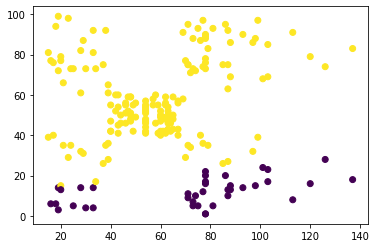

In [ ]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
labels=gm.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

# YOUR CODE HERE





b) Take the gaussians found with the selected $k$ and plot the clusters with different colors. Show also the mean and variance of each gaussian. Use this information to make a brief description of the kind of customers in each cluster.

In [ ]:
# YOUR CODE HERE


c) The marketing team wants to incorporate some luxury products to the supermarket. They want to track the purchases of those clients that could be interested in luxury products to know their interests and build the marketing campign according to this. They ask you to tell them which costumers could be potentially interested in this kind of products. Reason your answer.

d) A new customer downloaded the app of the supermarket two weeks ago and has an anual income of $40k $ and a spending score of $30k $. Use your GMM to predict to which cluster does he belong. Should he be a target of the luxury advertisement campaign? Why?

In [ ]:
# YOUR CODE HERE
